<a href="https://colab.research.google.com/github/loutferdine/Stock-price-simulation-using-GBM/blob/master/Tesla_stock_price_simulation_(GBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

It would be fantastic if we can precisely predict how stock prices will change in near or far future. We would be rich, but it is almost impossible to create exact predictions.

There are so many factors impacting the movement of stock prices that are hard to find. For example the investor sentiment or confidence can cause the market to go up or down. Investors, for sure, make their decisions based on empirical evidence, stock market indicators, and macro/micro economics

The information or data could be interpreted differently depending on the risk appetite and the mood of the investor at the moment investing. While a piece of breaking news or a simple twitter from US president causes an investor to buy a stock, it causes another one to sell that same stock.

Therefore, predicting precisely the variation of stock prices is very difficult. However, we still have valuable models which can help us to understand the stock price movement up to some point.

This short tutorial will provide an example of simulating the stock prices using one of well-known stochastic processes so-called "**Geometric brownian motion (GBM)**"

# Theory Geometric brownian motion

In order to find the expected stock price of the asset, a **Geometric Brownian Motion** has been used, which expresses the change in stock price using a constant drift $\mu$ and volatility $\sigma$ as a stochastic differential equation (SDE):
\begin{equation}
	\left\lbrace
  \begin{aligned}
      \frac{dX_{t}}{X_t} &= \mu dt + \sigma dW_t\\
      X_0   &= x 
  \end{aligned}
 	\right.
\end{equation}

Where:

* $\mu$ is a diagonal matrix of expected index returns.

* $D$ is a diagonal matrix with $X_t$ along the diagonal.

* $\sigma$ is a diagonal matrix of standard deviations of index returns.


By using the substitution $Z_t = log(X_t)$, and since the corresponding deterministic linear equation is an exponential function of time **Itô's formula yields**, so we have the following equation for $dZ_t$:

\begin{equation}
	\left\lbrace
  \begin{aligned}
      dZ_{t} &= (\mu - \frac{1}{2} \sigma^2) dt + \sigma dW_t\\
      Z_0   &= log(x) 
  \end{aligned}
 	\right.
\end{equation}

The solution of the equation is defined as follow:

$X_t = x e^{(\mu - \frac{1}{2} \sigma^2)t + \sigma W_t} \tag{1}$


As illustrated below, the stock price follows a series of steps, where each step is a drift plus or minus a random shock (itself a function of the stock's standard deviation):

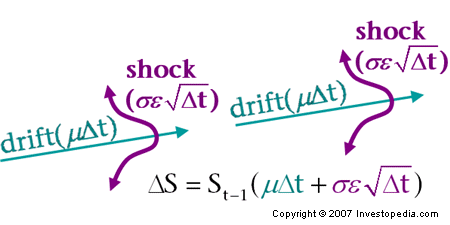

#Overiew
In this tutorial a Geometric Brownian Motion (GBM) has been used to predict the closing prices of the Tesla stock price.
Using the full historical closing prices, the predicted prices have also been compared to observed stock prices, in order to evaluate the validity of the prediction models.

#Tesla stock price - Data analysis

In order to assess the validity of the prediction models, historical closing prices of the Tesla stock has been compared to simulated prices by using basic statistical tests. A time series of the closing prices of the Tesla stock, as well as the log returns of the series can be seen in *Figure 1* and *figure 2*.

We are using Yahoo stock market data open-API to extract the closing prices. 
This API offer a real-time or historical data on financial assets that are currently being traded in the markets, it usually offer prices of public stocks, ETFs, ETNs.
```
# To install yfinance before you use it.
> pip install yfinance
```

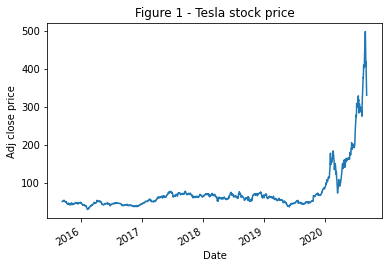

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

#load stock prices using yahoo API
tesla = web.get_data_yahoo("TSLA")

closePrice = tesla['Adj Close']

closePrice.plot()
plt.xlabel("Date")
plt.ylabel("Adj close price")
plt.title("Figure 1 - Tesla stock price")
plt.show()


As can be seen by the time series of returns, the data shows signs of volatility clustering, with large volatility around the time of COVID-19 crisis.

Text(0.5, 1.0, 'Figure 2 - Tesla log return')

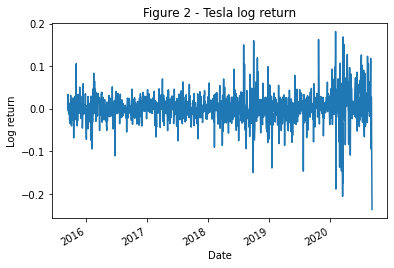

In [3]:
import math
import numpy as np

# Compute the logarithmic returns using the adjusted closing price 
logReturn = np.log(closePrice/closePrice.shift(1))

n  = np.size(logReturn)
mu   = np.mean(logReturn);
sigma       = np.std(logReturn);

logReturn.plot()
plt.xlabel("Date")
plt.ylabel("Log return")
plt.title("Figure 2 - Tesla log return")



**Historical volatility of Risk-Adjusted Return for Tesla**

The rolling function uses a window of **20 trading days**. Each of the days in the selected lookback period is assigned an equal weight. 

As can be seen in the graph below, the volitilty is very high during the period of lockdown caused by COVID-19.

[       nan        nan        nan ... 0.84246624 0.93540195 0.92362089]


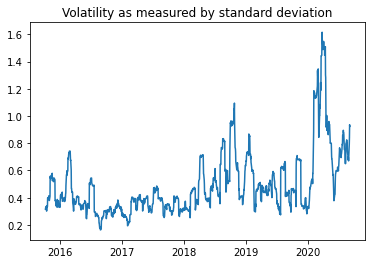

In [ ]:
sigmaR = logReturn.rolling(window=20).std() * np.sqrt(252)
print(sigmaR.values)
plt.plot(sigmaR) 
plt.title('Volatility as measured by standard deviation') 
plt.show() 